In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import scipy as sp
import scipy.stats as st
import gpflow

import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

In [3]:
def f(x):
    return np.cos(4 * x) + np.exp(-(x ** 2) / 2)

<IPython.core.display.Javascript object>

In [4]:
n = 10000

<IPython.core.display.Javascript object>

In [5]:
x_init = np.linspace(-5, 5, num=n).reshape(-1, 1)
y_init = f(x_init).reshape(-1, 1)

<IPython.core.display.Javascript object>

In [6]:
def plot(x, y, y_hat=None, y_hat_var=None, xy_n=None):
    x = np.squeeze(x.copy())
    y = np.squeeze(y.copy())

    fig, ax = plt.subplots()
    plt.plot(x, y, color="black", alpha=0.25)
    if y_hat is not None:
        y_hat = np.squeeze(y_hat.copy())
        plt.plot(x, y_hat, color="darkred")
    if y_hat is not None and y_hat_var is not None:
        y_hat_var = np.squeeze(y_hat_var.copy())
        ax.fill_between(
            x,
            y_hat - np.sqrt(y_hat_var),
            y_hat + np.sqrt(y_hat_var),
            color="darkred",
            alpha=0.2,
        )

    if xy_n is not None:
        plt.scatter(xy_n[0], xy_n[1], color="darkred")
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    return fig, ax

<IPython.core.display.Javascript object>

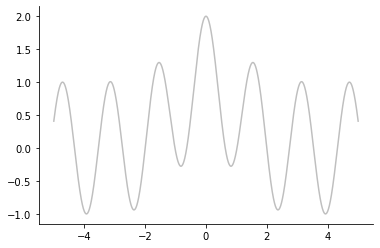

<IPython.core.display.Javascript object>

In [7]:
plot(x_init, y_init)
plt.show()

In [8]:
def fit_gp(x, y):
    kernel = gpflow.kernels.RBF()
    gp = gpflow.models.GPR(
        (x, y), kernel, mean_function=gpflow.mean_functions.Constant()
    )
    return gp

<IPython.core.display.Javascript object>

In [9]:
def predict_gp(gp, x):
    y_hat, y_hat_var = gp.predict_f(x)
    return y_hat.numpy(), y_hat_var.numpy()

<IPython.core.display.Javascript object>

In [10]:
def acquisition_function(y_hat, y_hat_var, conf):
    ucb = y_hat + conf * np.sqrt(y_hat_var)
    x_next_idx = np.argmax(ucb)
    x_next = x_init[x_next_idx]

    return x_next, ucb

<IPython.core.display.Javascript object>

In [11]:
def acquire(x, y, x_init, conf=1.96):
    gp = fit_gp(x, y)
    y_hat, y_hat_var = predict_gp(gp, x_init)

    x_next, ucb = acquisition_function(y_hat, y_hat_var, conf)

    return x_next, ucb, y_hat, y_hat_var

<IPython.core.display.Javascript object>

In [12]:
np.random.seed(42)

x_n = st.uniform.rvs(-5, 5, size=(1))
y_n = f(x_n)

<IPython.core.display.Javascript object>

In [13]:
conf = 2.0

<IPython.core.display.Javascript object>

In [14]:
x_d = np.array([x_n])
y_d = np.array([y_n])
x_n, ucb, y_hat, y_hat_var = acquire(x_d, y_d, x_init, conf=conf)

<IPython.core.display.Javascript object>

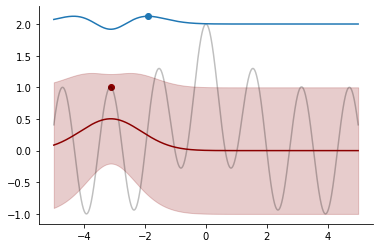

<IPython.core.display.Javascript object>

In [15]:
fig, ax = plot(x_init, y_init, y_hat, y_hat_var, xy_n=[x_d, y_d])
plt.plot(x_init, ucb)
plt.scatter(x_n, np.max(ucb))
plt.show()

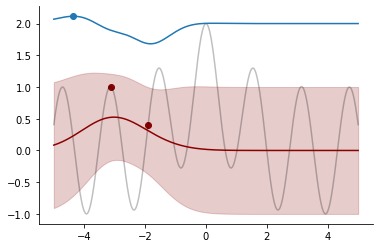

<IPython.core.display.Javascript object>

In [16]:
y_n = f(x_n)

x_d = np.vstack([x_d, x_n])
y_d = np.vstack([y_d, y_n])
x_n, ucb, y_hat, y_hat_var = acquire(x_d, y_d, x_init, conf=conf)

fig, ax = plot(x_init, y_init, y_hat, y_hat_var, xy_n=[x_d, y_d])
plt.plot(x_init, ucb)
plt.scatter(x_n, np.max(ucb))
plt.show()

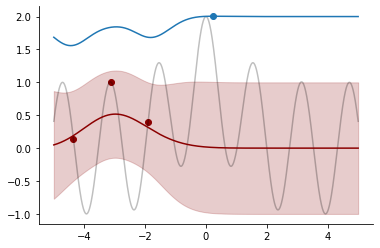

<IPython.core.display.Javascript object>

In [17]:
y_n = f(x_n)
x_d = np.vstack([x_d, x_n])
y_d = np.vstack([y_d, y_n])
x_n, ucb, y_hat, y_hat_var = acquire(x_d, y_d, x_init, conf=conf)

fig, ax = plot(x_init, y_init, y_hat, y_hat_var, xy_n=[x_d, y_d])
plt.plot(x_init, ucb)
plt.scatter(x_n, np.max(ucb))
plt.show()

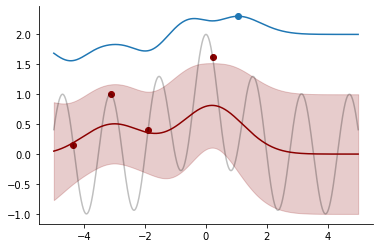

<IPython.core.display.Javascript object>

In [18]:
y_n = f(x_n)
x_d = np.vstack([x_d, x_n])
y_d = np.vstack([y_d, y_n])
x_n, ucb, y_hat, y_hat_var = acquire(x_d, y_d, x_init, conf=conf)

fig, ax = plot(x_init, y_init, y_hat, y_hat_var, xy_n=[x_d, y_d])
plt.plot(x_init, ucb)
plt.scatter(x_n, np.max(ucb))
plt.show()

In [19]:
for i in range(10):
    y_n = f(x_n)
    x_d = np.vstack([x_d, x_n])
    y_d = np.vstack([y_d, y_n])
    x_n, ucb, y_hat, y_hat_var = acquire(x_d, y_d, x_init)

<IPython.core.display.Javascript object>

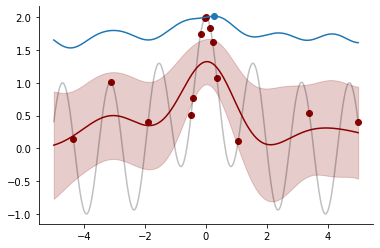

<IPython.core.display.Javascript object>

In [20]:
fig, ax = plot(x_init, y_init, y_hat, y_hat_var, xy_n=[x_d, y_d])
plt.plot(x_init, ucb)
plt.scatter(x_n, np.max(ucb))
plt.show()

## Local penalization